# Laboratory Session 04 : April 21, 2022
# Exercises due on : May 8, 2022

## Student: Capodaglio Alessandro Maria
## ID: 2039109

# Exercise 1 - Community Mobility Open Data

Community Mobility Reports have been created with the aim to provide insights into
what has changed in response to policies aimed at combating COVID-19. Data can be
found at https://www.google.com/covid19/mobility/

Produce a plot of the data by averaging the observable(s) over a period of one week.

In [1]:
library("tidyverse")


data <- read_csv("Global_Mobility_Report.csv")
data_italy <- filter(data, country_region_code == 'IT')
data_croatia <- filter(data,  country_region_code == 'HR')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 9685777 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): country_region_code, country_region, sub_region_1, sub_region_2, m...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#Only pick a certain year by creating a "mask" that only keeps the rows where the year is 2021
italy_in_2021 <- as.numeric(format(data_italy$date, format = '%Y')) == 2021
croatia_in_2021 <- as.numeric(format(data_croatia$date, format = '%Y')) == 2021


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




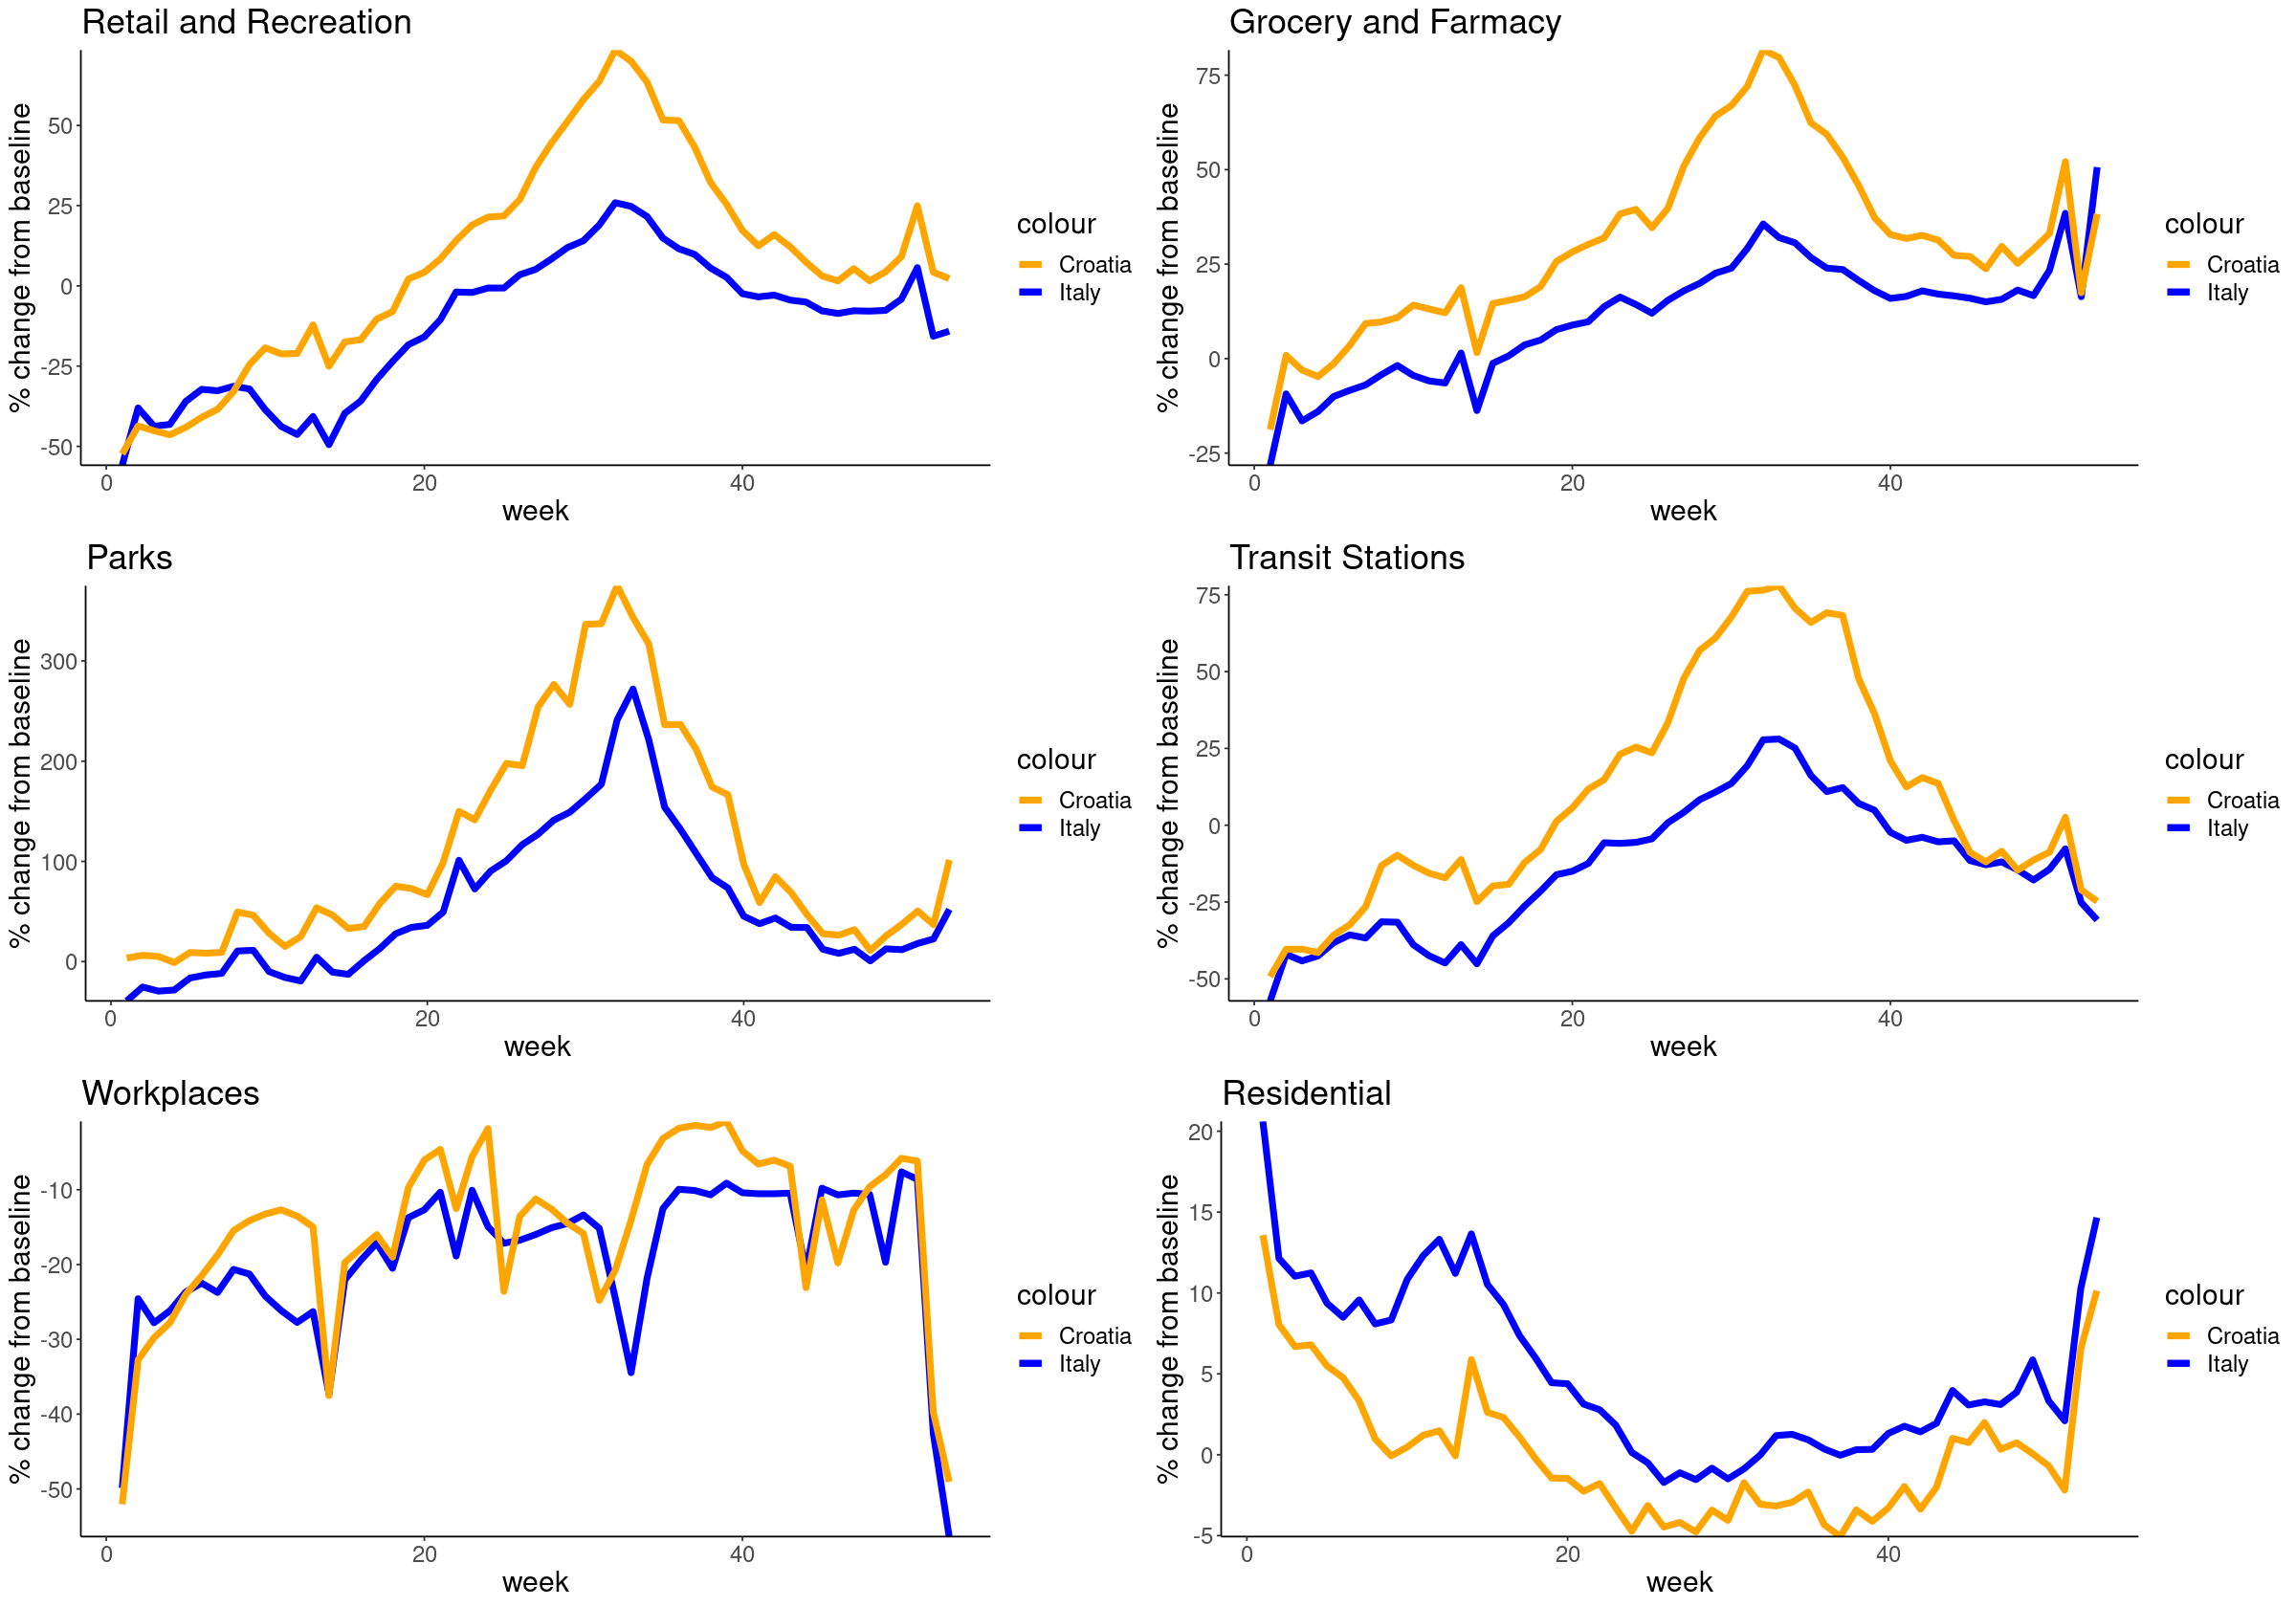

In [3]:
library("lubridate")
library("ggplot2")
library("ggpubr")


#Apply the mask on the data
data_italy_2021 <- data_italy[italy_in_2021,]
data_croatia_2021 <- data_croatia[croatia_in_2021,]

#Average each observable over one week (the "10:15 slicing" is just the different observables)
weeks_it <- aggregate(data_italy_2021[, 10:15], list(week(data_italy_2021$date)), mean, na.rm=TRUE)
weeks_hr <- aggregate(data_croatia_2021[, 10:15], list(week(data_croatia_2021$date)), mean, na.rm=TRUE)
week <- weeks_it[, 1]

    
options(repr.plot.width = 20, repr.plot.height = 14)
ret_and_rec <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,2], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,2], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Retail and Recreation')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))


groc_and_farm <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,3], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,3], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Grocery and Farmacy')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))


parks <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,4], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,4], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Parks')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))

trans_stat <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,5], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,5], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Transit Stations')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))

work <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,6], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,6], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Workplaces')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))


residential <- ggplot() +
    geom_line(aes(x = week, y = weeks_it[,7], color = 'Italy'), size = 2) + 
    geom_line(aes(x = week, y = weeks_hr[,7], color = 'Croatia'), size = 2) +
    theme_classic()+
    ggtitle('Residential')+
    theme(text = element_text(size = 18)) +
    scale_x_continuous(name= "week", expand = c(0.05, 0))+
    scale_y_continuous(name= "% change from baseline", expand = c(0, 0))+
    scale_colour_manual(values=c('Orange', 'Blue'))

ggarrange(ret_and_rec, groc_and_farm,parks,trans_stat,work,residential, nrow = 3, ncol = 2)


# Exercise 2 - Random number generators

One of the first random number generator was proposed by von Neumann, the so-called
middle square algorithm.
Write R code to implement this type of generator and, given a fixed digit number input,
square it an remove the leading and trailing digits, in order to return a number with the
same number of digits as the original number.

Note that when the outputted number starts with a 0, the number of digits for the next iteration is reduced by 1. 

In [4]:
VN_midsq <-  function(x,n){
    
    for(i in 1:n){
        cat(paste('\n Inputted number is '), x)
        len_x <- length(unlist(strsplit(as.character(x),"")))
        
        x_sq_list <- unlist(strsplit(as.character(x*x),""))       
        
        if(len_x%%2 == 0){
            trim_start <- len_x/2
            trim_end = len_x/2
        }
           else {
               trim_start <- floor(len_x/2)
               trim_end <-  floor(len_x/2)+1
        }
           
        # Pad with zeros
        x_sq_list = c(rep(0, 2*len_x-length(x_sq_list)), x_sq_list) 
        x = x_sq_list[(trim_start+1):(2*len_x- trim_end)]
        x = as.numeric(paste(x, collapse=""))
        cat(paste(', Outputted number is'), x)
        
    }      
}

VN_midsq(21209, 1)


 Inputted number is  21209, Outputted number is 49821

# Exercise 3 - Bayesian Inference

A publishing company has recently launched a new journal. In order to determine
how effective it is in reaching its possible audience, a market survey company selects a
random sample of people from a possible target audience and interviews them. Out of
150 interviewed people, 29 have read the last issue of the journal.

## a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

An appropriate distribution to assign to $y$ is a binomial distribution of the form: 
$$
P_{X}(x = 29) = \binom{150}{29}p^{29}(1-p)^{121}
$$


In this assumption we are considering that: 
1. each reader doesn't decide to read the last issue of the journal according to what other people have done (i.e. the "trials" are independent)
2. the probability that a reader has of having read the last issue of the journal is the same for every reader


Both of these assumptions are debatable in the following way for example: 
1. people recommend each other articles all the time
2. some readers may live/work in areas where the probability for them to read the journal is higher/lower than other areas

## b) Assuming a uniform prior, what is the posterior distribution for y ?

Assuming a uniform prior, the posterior would retain the same shape of the likelyhood.


### c) Plot both posterior and likelihood distributions functions

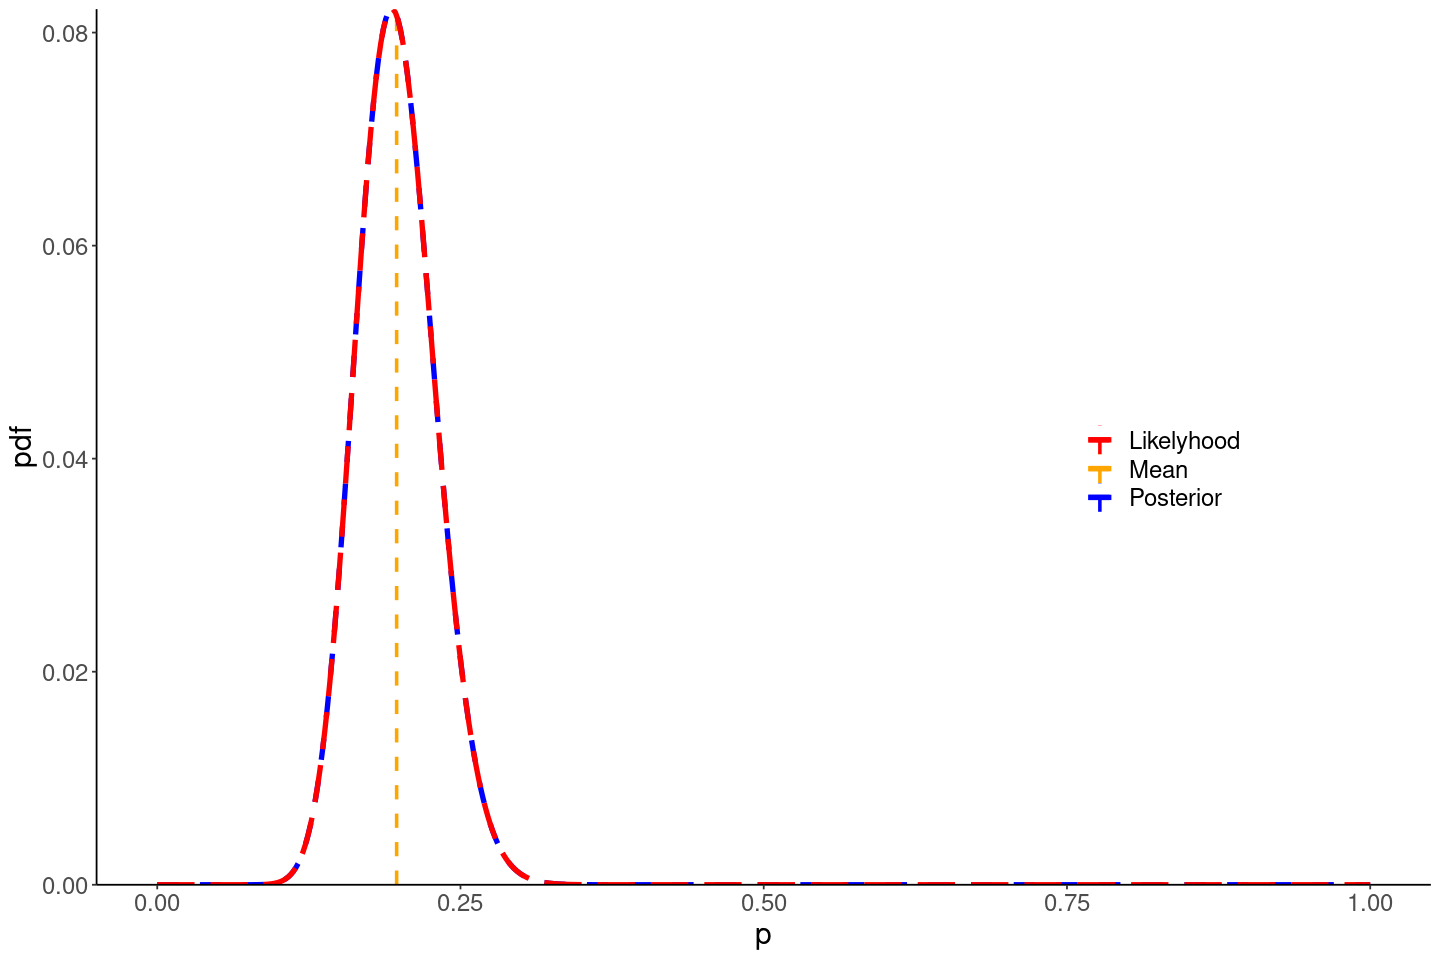

In [5]:
n <- 150
k <- 29 

p_step <- 0.002

p <- seq(0,1, length.out = 1/p_step)

p_post <- dbinom(x = k, size = n, prob = p)

p_norm <- p_post/(p_step * sum(p_post))

p_mean <- p_step * sum(p*p_norm)


likelyhood <- dbinom(x = k, size = n, prob = p)


df_journal_prob  <- data.frame(p, p_post, likelyhood)

options(repr.plot.width=12, repr.plot.height=8)


plot <- ggplot(df_journal_prob, aes(x=p, y= df_journal_prob[,2], colour= 'Posterior')) +
            geom_vline(aes(xintercept = p_mean, colour = 'Mean'), linetype = 'dashed', size = 1) + 
            geom_line(linetype = 'dashed', size = 1.5) +
            geom_line(data = df_journal_prob, mapping = aes(x=p, y= df_journal_prob[,3], colour= 'Likelyhood'), linetype ='longdash', size = 1.5) + 
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= "p", expand = c(0.05, 0))+
            scale_y_continuous(name= "pdf", expand = c(0, 0)) +
            expand_limits(y=0)+
            scale_color_manual(values=c("red", "orange", "blue"),
                     name = "")+
            theme(legend.position=c(0.8, 0.5))

plot



# Exercise 4 - Bayesian Inference

A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H

In [6]:
n = 30
h = 15 #number of heads

### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

#### I have chosen a biased beta prior with parameters (a = 3, b = 15).

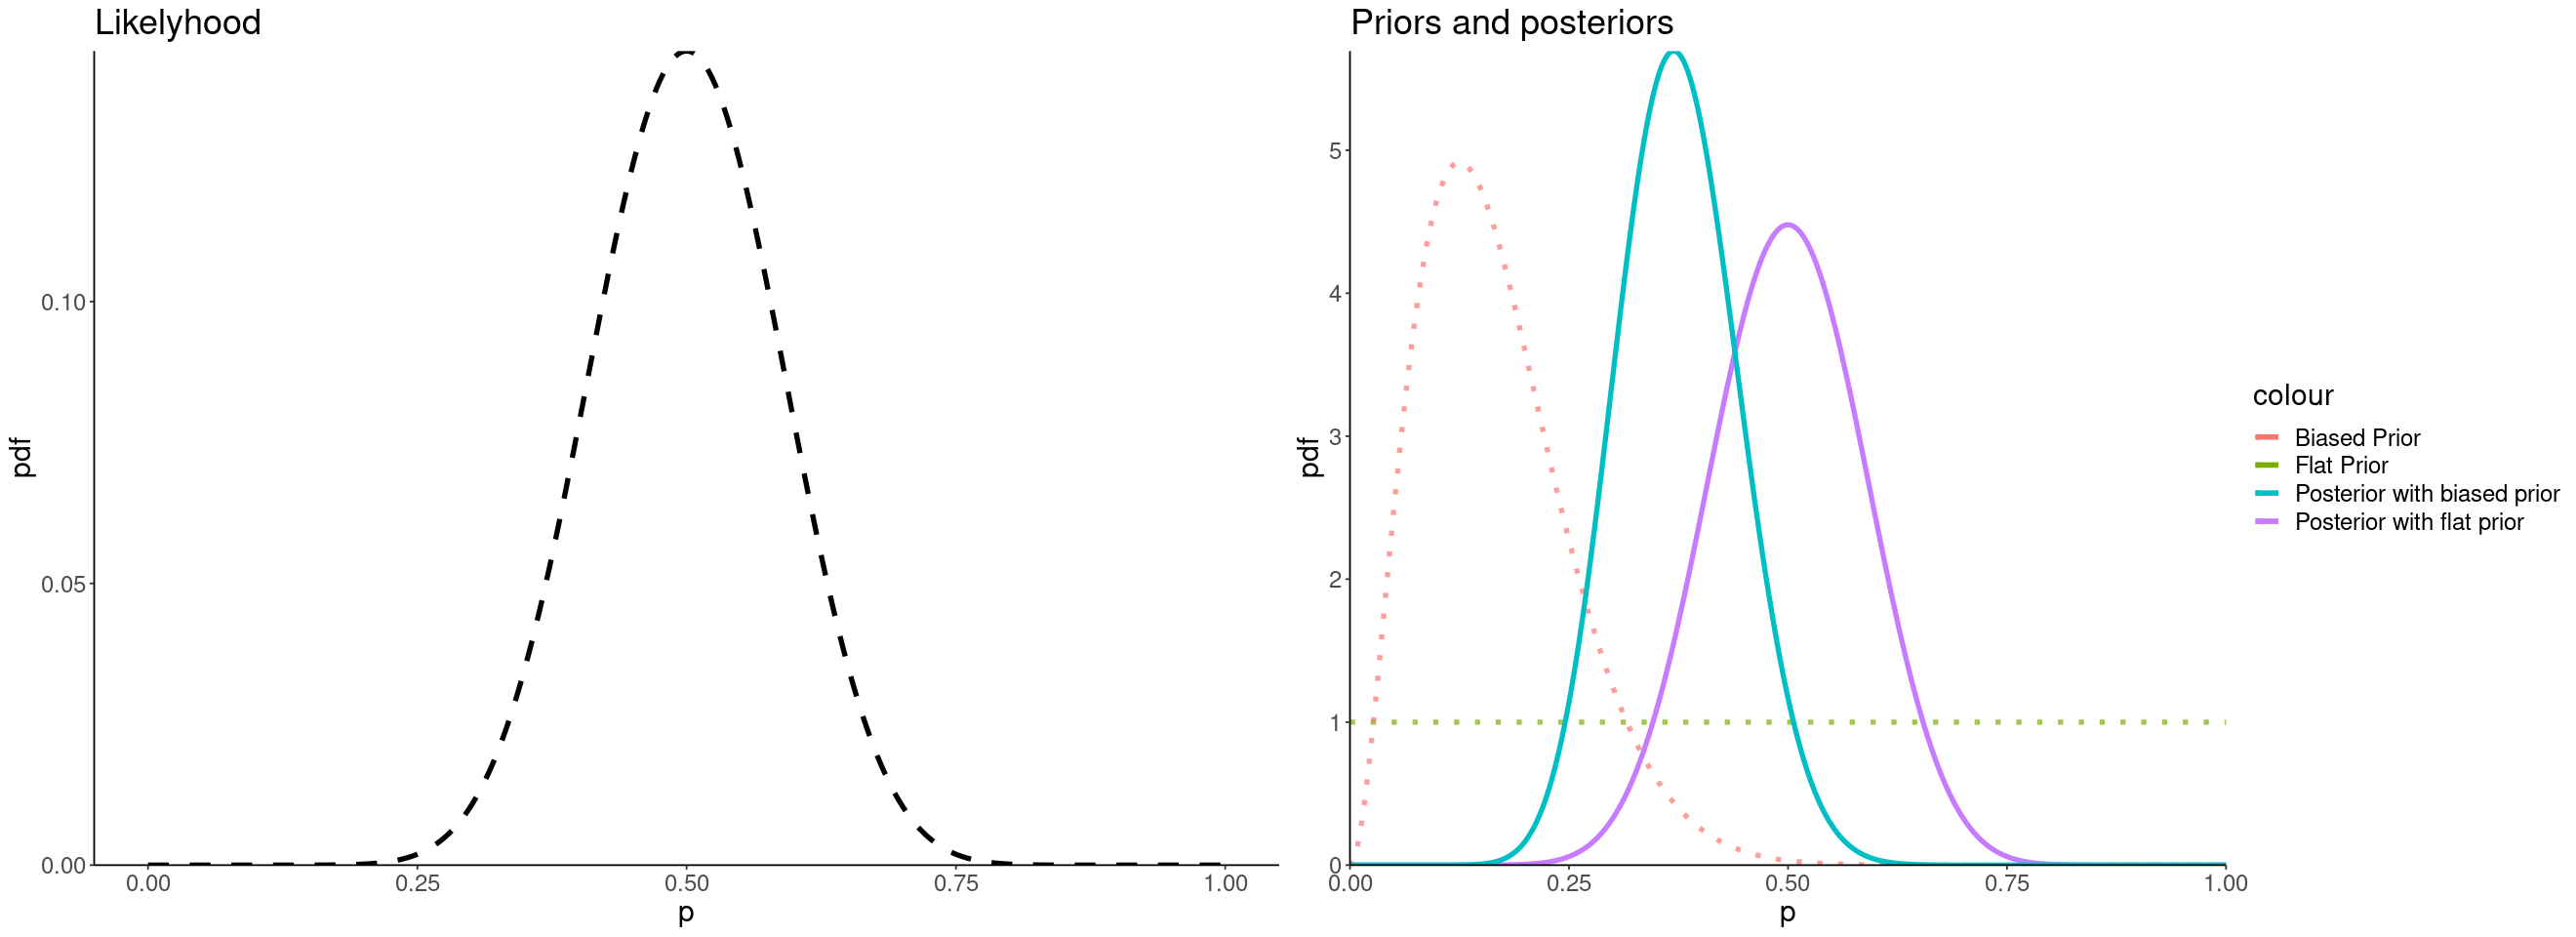

In [7]:
library("ggplot2")
library("ggpubr")

samples <- 1000
p_step <- 1/samples

p <- seq(0,1, length.out = 1/p_step)

likelyhood_coin <- function(p){dbinom(x = h, size = n, prob = p)}



prior_beta_flat <- function(p){dbeta(p, shape1 = 1, shape2 = 1)}
prior_beta_biased <-function(p){ dbeta(p, shape1 = 3, shape2 = 15)}


mean_beta <- function(alpha, beta, h = 0, n = 0){(alpha + h)/(alpha+beta+n)}
mode_beta <- function(alpha, beta, h = 0, n = 0){(alpha + h - 1)/(alpha+beta+n-2)}


posterior_beta_flat <- function(p){likelyhood_coin(p)* prior_beta_flat(p)}
norm_flat <- integrate(posterior_beta_flat, 0,1)$value
posterior_beta_flat_norm <- posterior_beta_flat(p)/norm_flat

posterior_beta_biased <- function(p){likelyhood_coin(p) * prior_beta_biased(p)}
norm_biased <- integrate(posterior_beta_biased, 0,1)$value
posterior_beta_biased_norm <- posterior_beta_biased(p)/norm_biased



df_prob  <- data.frame(p, likelyhood_coin(p), prior_beta_flat(p), prior_beta_biased(p), posterior_beta_flat_norm, posterior_beta_biased_norm)

options(repr.plot.width=22, repr.plot.height=8)


likelyhood <- ggplot(df_prob, aes(x=p, y= df_prob[,2])) +
            geom_line(linetype = 'dashed', size = 1.5) +
            theme_classic()+
            theme(text = element_text(size = 18)) +
            ggtitle('Likelyhood')+
            scale_x_continuous(name= "p", expand = c(0.05, 0))+
            scale_y_continuous(name= "pdf", expand = c(0, 0)) +
            expand_limits(y=0)



prior <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,3],colour= 'Flat Prior'), linetype ='dotted', size = 1.5, alpha = 0.7) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,4],colour= 'Biased Prior'), linetype ='dotted', size = 1.5, alpha = 0.7) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,5],colour= 'Posterior with flat prior'), size = 1.5) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,6],colour= 'Posterior with biased prior'), size = 1.5) +
            ggtitle('Priors and posteriors')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))



ggarrange(likelyhood, prior, nrow = 1, ncol = 2)



### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

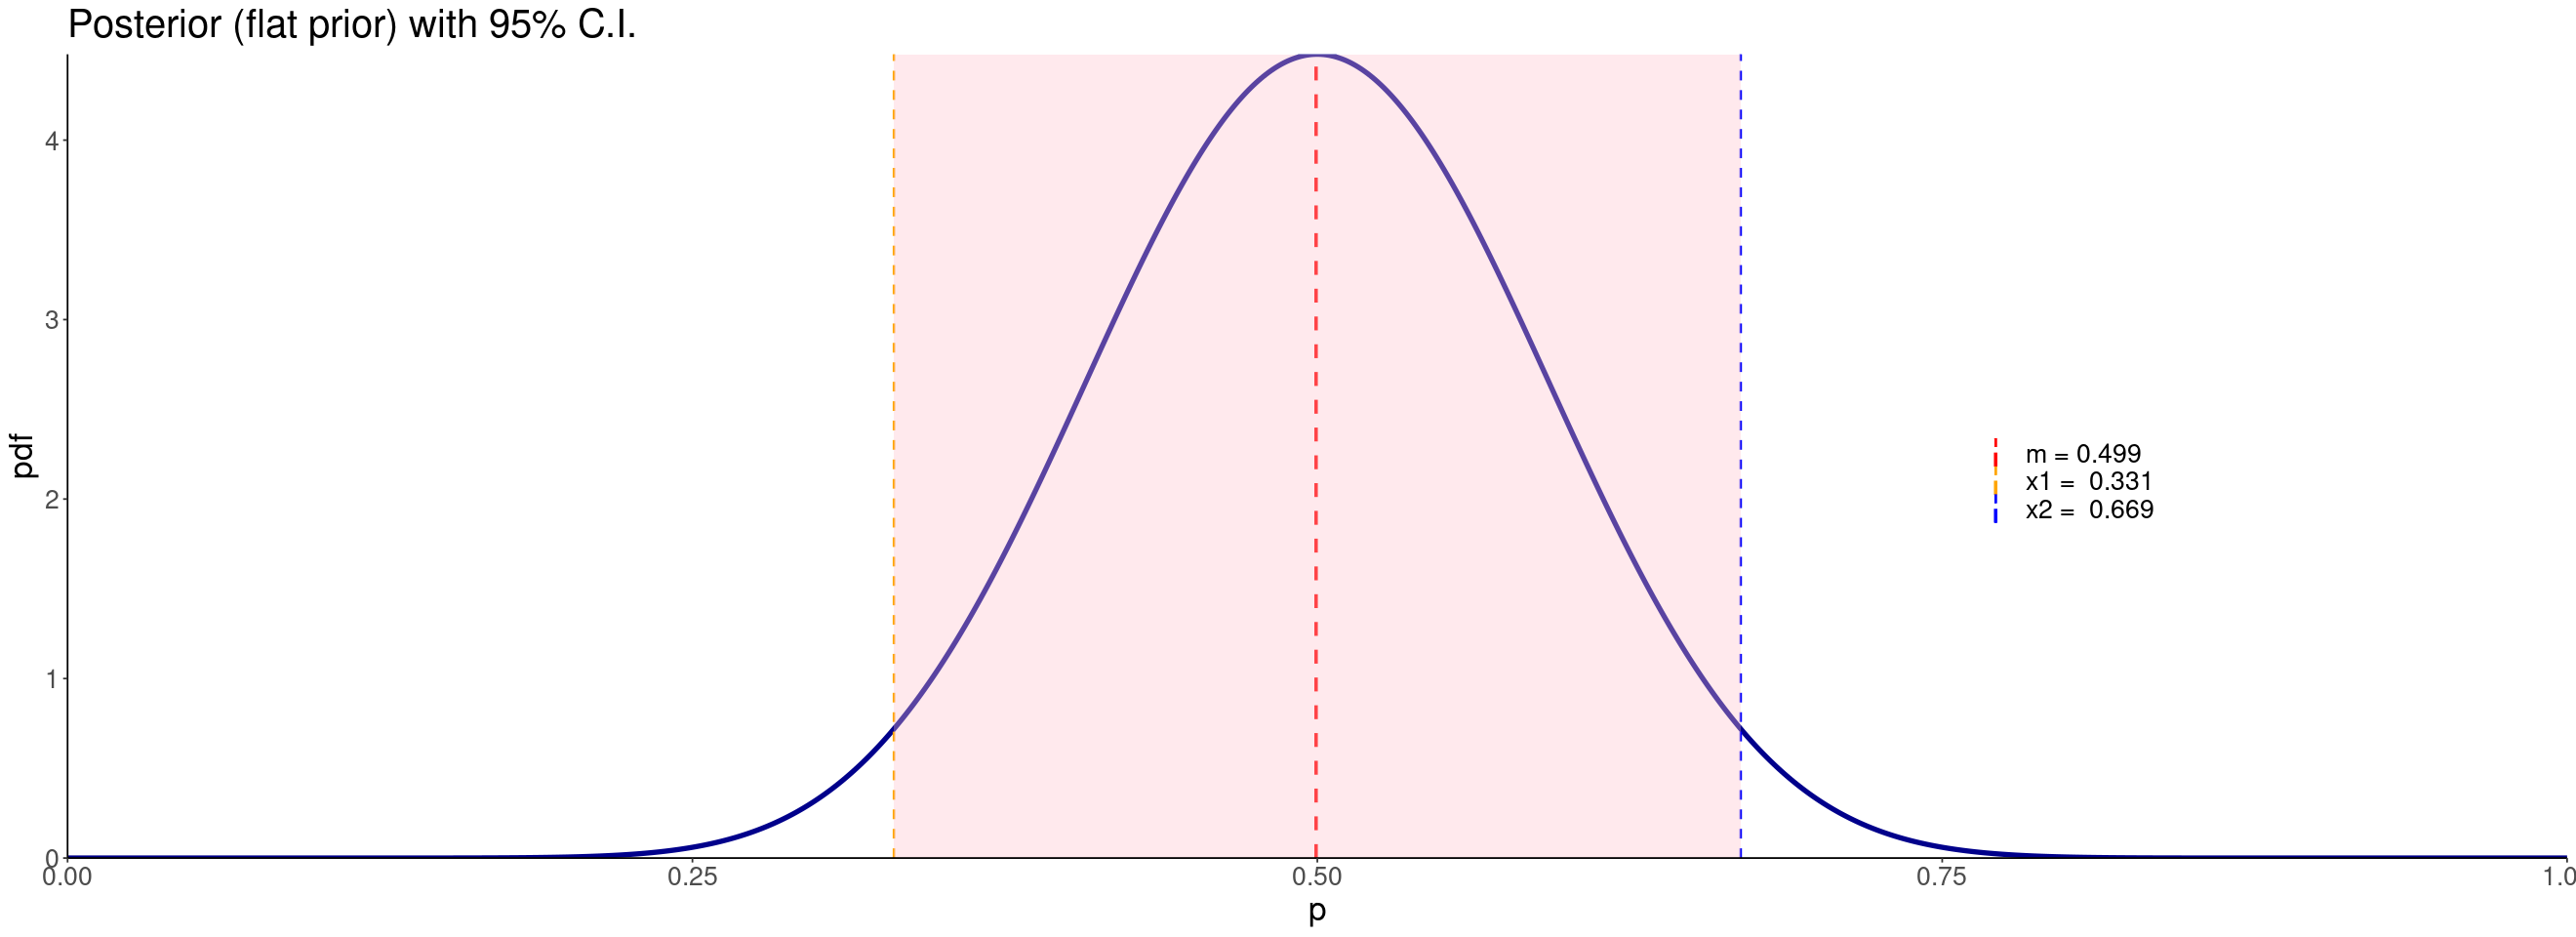

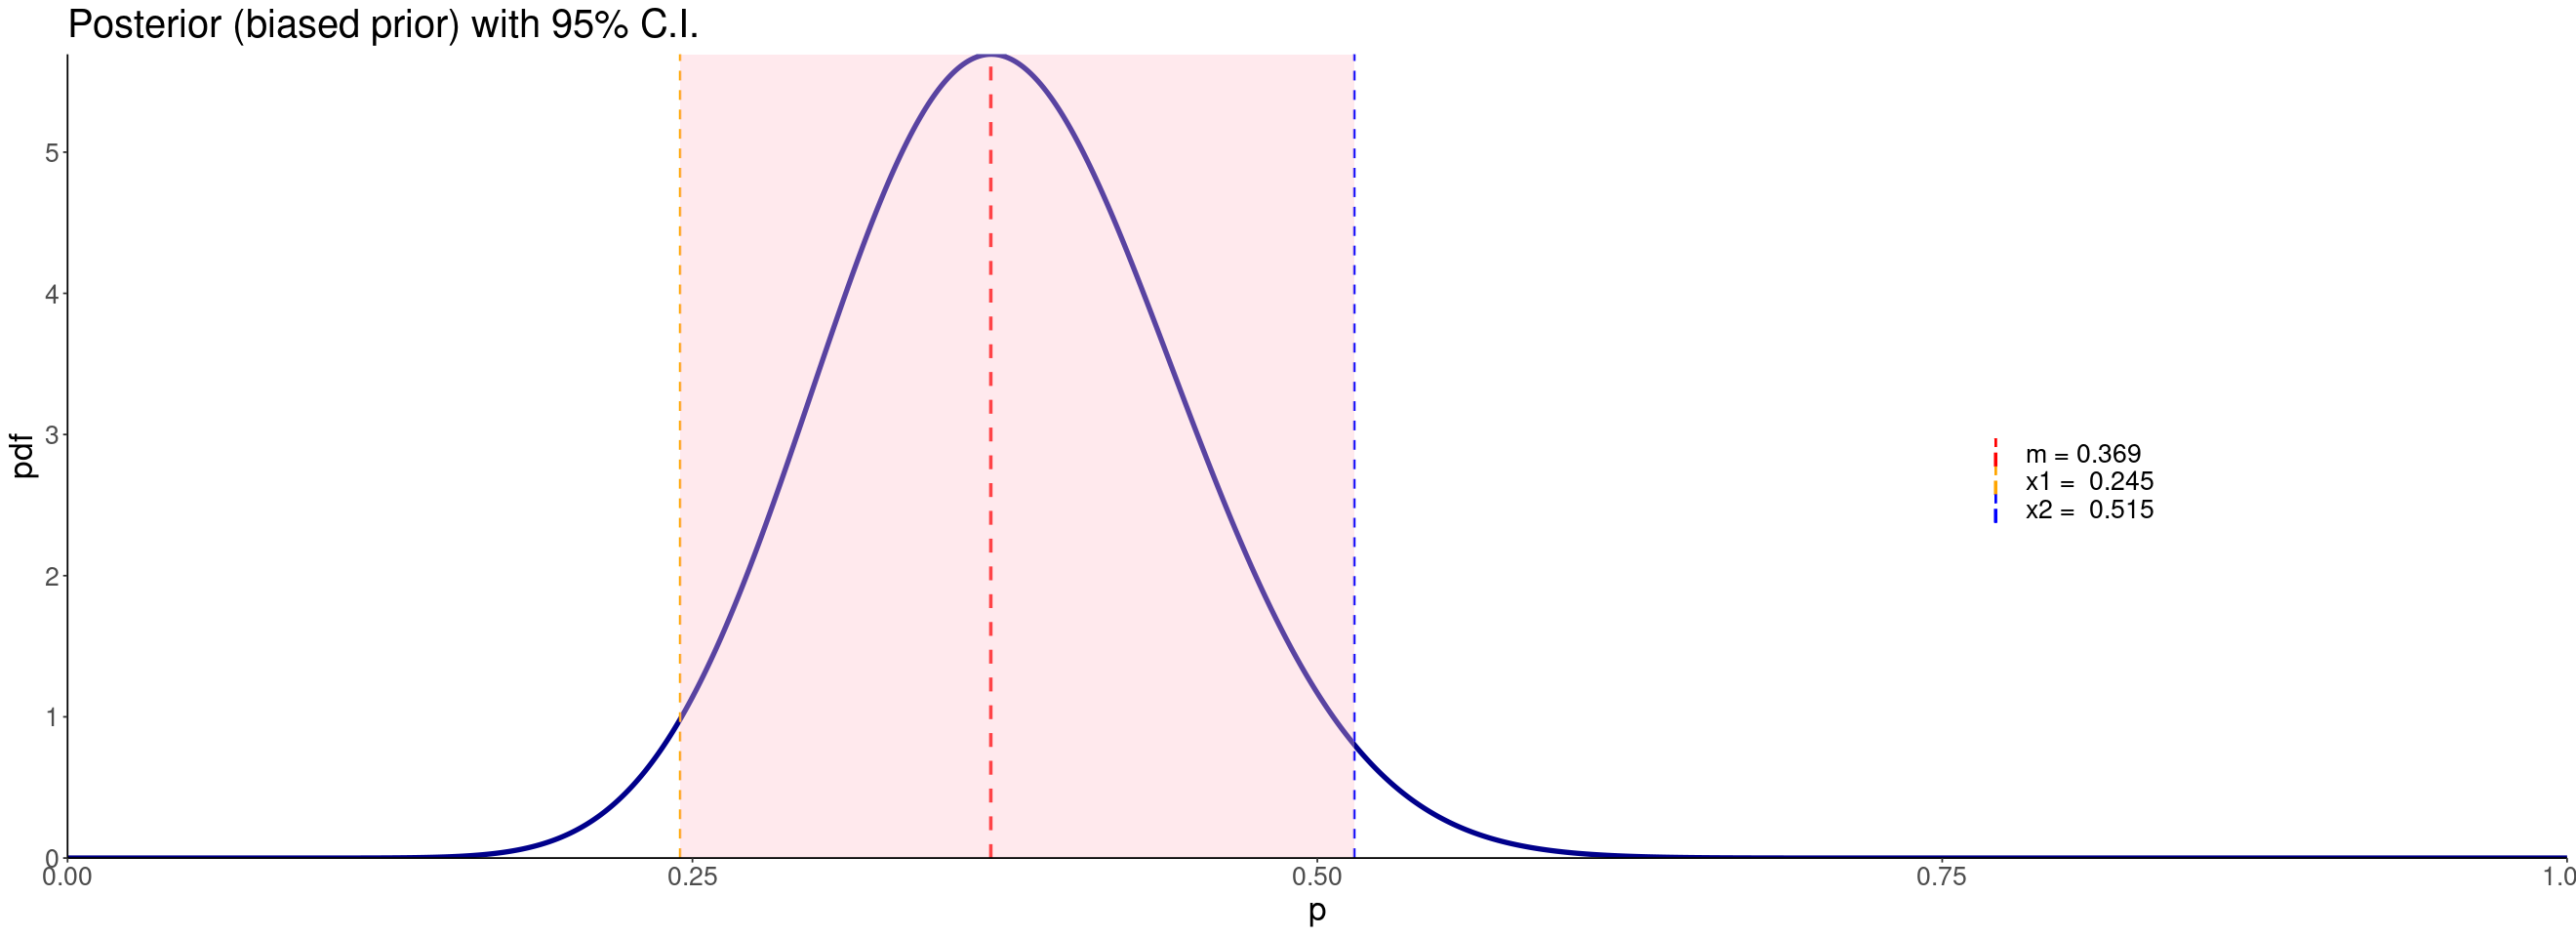

In [8]:
library("ggplot2")
index_flat <- which.max(df_prob[,5])
#select most probable value for coin probability (if flat prior) based on maximum of posterior distribution
max_flat <- df_prob[index_flat,1]

index_biased <- which.max(df_prob[,6])
#select most probable value for coin probability (if biased prior) based on maximum of posterior distribution
max_biased <- df_prob[index_biased,1]

limits <- function(q, a_prior, b_prior){
    a_post <- a_prior + 15
    b_post <- b_prior + (30 - 15)
    lower <- qbeta(q, a_post, b_post)
    upper <- qbeta(1-q, a_post, b_post)
    return(c(lower, upper))
}

flat_cutoffs <- limits(0.025,1,1)
biased_cutoffs <- limits(0.025,3,15)

flat_post_with_cred <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,5]), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = max_flat , colour = paste('m =', round(max_flat, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = flat_cutoffs[1], colour = paste('x1 = ', round(flat_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = flat_cutoffs[2],  colour = paste('x2 = ', round(flat_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior (flat prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob, aes(y = df_prob[,5], xmax = flat_cutoffs[2],xmin = flat_cutoffs[1]), fill = 'pink', alpha = 0.35)



biased_post_with_cred <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,6]),color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = max_biased , colour = paste('m =', round(max_biased, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = biased_cutoffs[1], colour = paste('x1 = ', round(biased_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = biased_cutoffs[2],  colour = paste('x2 = ', round(biased_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior (biased prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "blue"),
                     name = "")+
            theme(legend.position=c(0.8, 0.5))+
            geom_ribbon(data = df_prob, aes(y = df_prob[,6], xmax = biased_cutoffs[2],xmin = biased_cutoffs[1]), fill = 'pink', alpha = 0.35)



flat_post_with_cred
biased_post_with_cred

### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

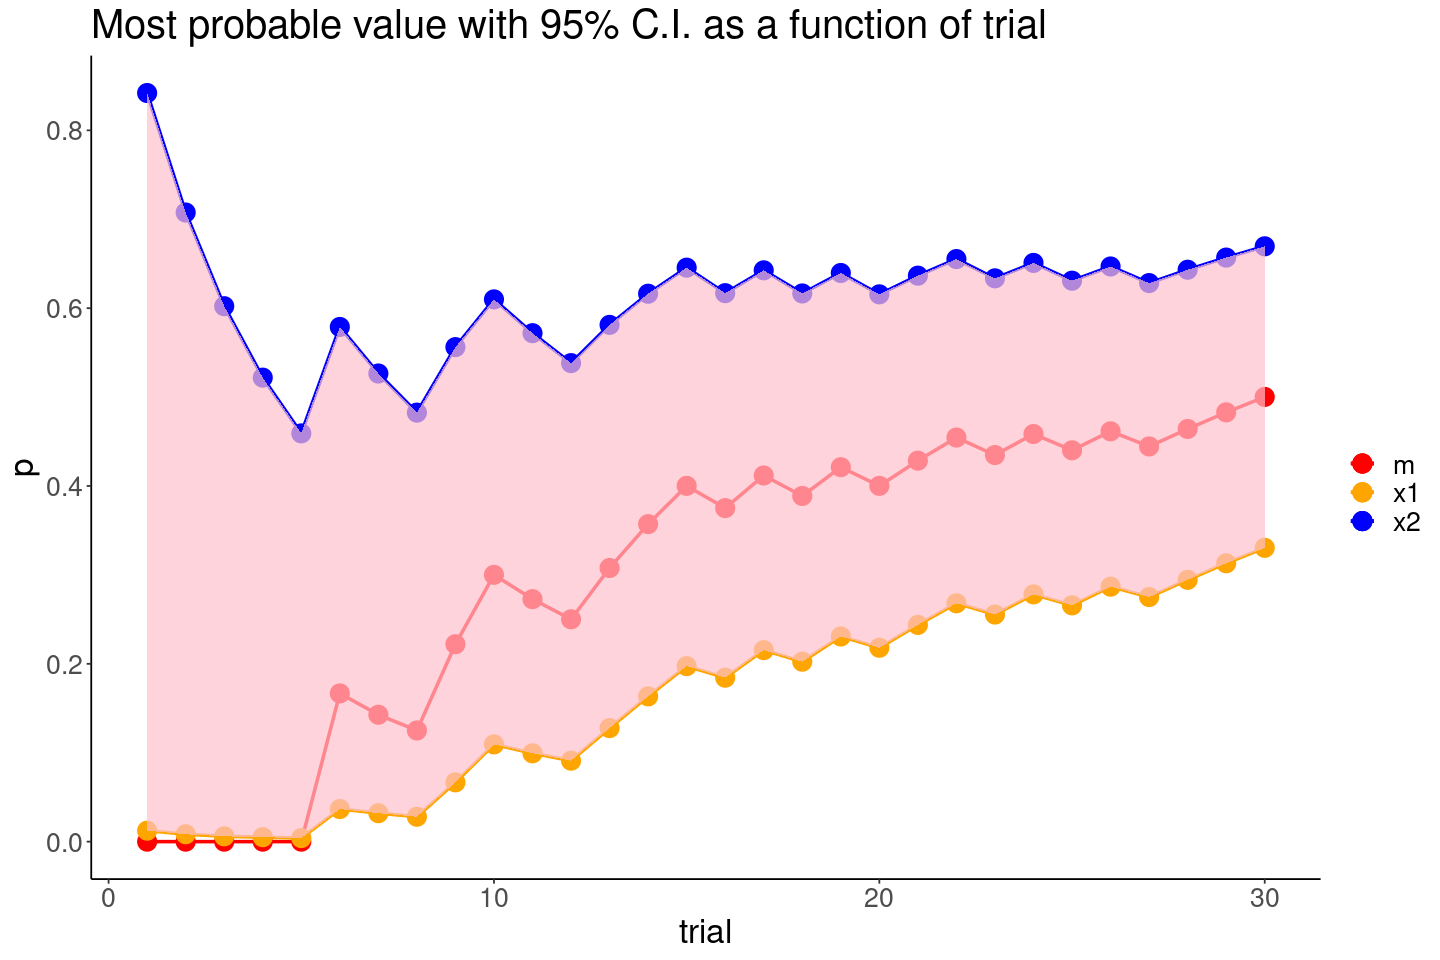

In [9]:
#I consider a success when heads comes up

succ<- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)

n.sample <- 3000
delta.p <- 1/n.sample
p <- seq(0, 1, length.out=n.sample)

m <- rep(0,30)
x1 <- rep(0,30)
x2 <- rep(0,30)

# Start with uniform prior
prior <- dunif(p, 0, 1) 

for(t in 1:length(succ)){
    s <- succ[t]
    likelyhood <- dbinom(s, 1, p)
    posterior <- likelyhood * prior
    normalized_post <- posterior/(delta.p*sum(posterior))
    
    m[t] <- p[which.max(normalized_post)]
    int <- cumsum(normalized_post)/n.sample
    x1[t] <- p[int>=0.025][1]
    x2[t] <- p[int>=0.975][1]
    prior <- normalized_post # - > posterior at each step becomes prior at next step
}
df_time_series <- data.frame(t=1:30, m, x1, x2)

options(repr.plot.width=12, repr.plot.height=8)


trials <-  ggplot() +
            geom_point(data = df_time_series, mapping = aes(x= t, y= df_time_series[,2], colour = 'm'), size = 5) +
            geom_line(data = df_time_series, mapping = aes(x= t, y= df_time_series[,2], colour = 'm'), size = 1) +

            geom_point(data = df_time_series, mapping = aes(x= t, y= df_time_series[,3], colour = 'x1'), size = 5) +
            geom_line(data = df_time_series, mapping = aes(x= t, y= df_time_series[,3], colour = 'x1'), size = 1) +

            geom_point(data = df_time_series, mapping = aes(x= t, y= df_time_series[,4], colour = 'x2'), size = 5) +
            geom_line(data = df_time_series, mapping = aes(x= t, y= df_time_series[,4], colour = 'x2'), size = 1) +
            
            theme_classic()+
            geom_ribbon(data = df_time_series, aes(x = t, ymax = df_time_series[,4],ymin = df_time_series[,3]), fill = 'pink', alpha = 0.7)+
            theme(text = element_text(size = 20)) +
            ggtitle('Most probable value with 95% C.I. as a function of trial')+
            scale_x_continuous(name= 'trial')+
            scale_y_continuous(name = 'p')+
            scale_color_manual(values=c("red", "orange", "blue"),
                     name = "")
trials

### Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

In [10]:
cat(paste('The most likely value of the probability at the last trial is',round(m[30],3), '\n with 95% C.I [', round(x1[30],3),',', round(x2[30],3), ']'))

The most likely value of the probability at the last trial is 0.5 
 with 95% C.I [ 0.33 , 0.67 ]

### The result obtained is equal to the one-step analysis in the case of a uniform prior.